In [689]:
########################################## BIAO AFOLABY ELRICK SULLIVAN ####################################################


from sklearn.linear_model import LogisticRegression 
LogisticRegression=LogisticRegression()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn import naive_bayes
from sklearn.svm import SVC,LinearSVC
#"KNeighborsClassifier":KNeighborsClassifier
LinearSVC=LinearSVC()
SVC=SVC()
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier=KNeighborsClassifier(n_neighbors=4)
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier=DecisionTreeClassifier(random_state=2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
gauss= naive_bayes.GaussianNB()
 #mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 
AdaBoostClassifier=AdaBoostClassifier(base_estimator=None,n_estimators=5,learning_rate=0.04)
Perceptron= Perceptron()
##, random_state=3)eta0=0#
RandomForestClassifier=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=5,learning_rate=0.04)
#"Perceptron":Perceptron,n_estimators=5
from sklearn.model_selection import GridSearchCV



#############################################################################################################################


def training_score(model):  
    print(" PAtienter svp *************************************************************************** ")
    for i in model:
        
       # i.fit(x_train,y_train)
       # ypredict=i.predict(x_test)
       # DecisionTreeClassifier   
      
        print(i,"::")
        i.fit(x_train,y_train)
        ypredict= i.predict(x_test)
        score=i.score(x_train,y_train)
        print("score::",score)
    print(" Terminé *************************************************************************** ")
    return 


def prediction_metrics(model):   
    print(" PAtienter svp *************************************************************************** ")
    for i in model:
     
        ypredict=i.predict(x_test)
        print("modele :",i)
        print ("la précision de ",i,"est :",metrics.accuracy_score(y_test, ypredict)*100," %")
        print([confusion_matrix(y_test,ypredict)])
        print(classification_report(y_test,ypredict))
    print(" Terminé *************************************************************************** ")
    return  
 

def validation_croisee(model):
    print(" Terminé *************************************************************************** ")
    for i in model:
        
        n,train_score,val_score=learning_curve(i,x_train,y_train,cv=5,scoring="f1",train_sizes=np.linspace(0.1,1,10))
        plot.plot(n,train_score.mean(axis=1))
        plot.plot(n,val_score.mean(axis=1))
    print(" Terminé *************************************************************************** ")
    return 



def split(new_data):
    
    
    x_train=new_data[new_data.columns[:-1]]
    y_train=new_data["Churn"]
    print(" Spliting Terminé *************************************************************************** ")
    return x_train,y_train
model_dic={"Perceptron":Perceptron,"GradientBoostingClassifier":GradientBoostingClassifier,
           "LogisticRegression":LogisticRegression,"SGDClassifier":SGDClassifier,"gauss":gauss,
           "AdaBoostClassifier":AdaBoostClassifier,"Perceptron":Perceptron,"SVC":SVC,
           "LinearSVC":LinearSVC,"RandomForestClassifier":RandomForestClassifier,"DecisionTreeClassifier":DecisionTreeClassifier}
model=[i for i in model_dic.values()]
tab=[]
#MLPClassifier":MLPClassifier
 

In [671]:
data=pd.read_csv(r"C:\Users\HP\Desktop\churn-bigml-80.csv")

In [672]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
# Le target à prédire est: Churn



In [673]:
# Dimensions du data_set
data.shape

(2666, 20)

In [674]:
#info gene
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [86]:
# Variables discretes et variables catégorielles 
data.dtypes.value_counts()
# 8 eniers, 8 reels, 3 variables catégorielles, 1 variable Booleenne

int64      8
float64    8
object     3
bool       1
dtype: int64

In [87]:
#Statistiques générales
data.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [88]:
# écart quadratique
ecart_quadratique=data.var()

In [89]:
ecart_quadratique

Account length            1565.308011
Area code                 1808.036973
Number vmail messages      185.294086
Total day minutes         2938.762071
Total day calls            399.526628
Total day charge            84.929733
Total eve minutes         2596.056893
Total eve calls            406.483869
Total eve charge            18.756385
Total night minutes       2578.641241
Total night calls          377.076533
Total night charge           5.221771
Total intl minutes           7.774888
Total intl calls             6.032893
Total intl charge            0.566726
Customer service calls       1.719339
Churn                        0.124402
dtype: float64

In [36]:
### Account length, Area code prsésentent une grande variance.De plus elles ne semnlent pas etre pertinente 

In [ ]:
#Etat des variables manquantes dans le dataset

<AxesSubplot:>

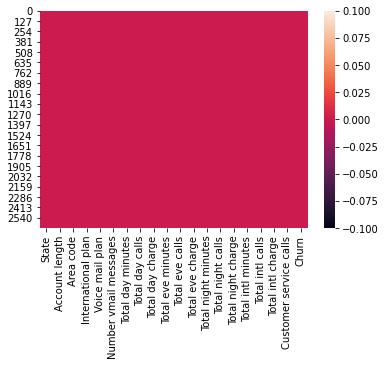

In [90]:
sb.heatmap(data.isna())

In [91]:
#Notre datasrt est ideal,il adeja été traité nous n'avons pas besoin de le prétraité
#Visualisons le nombre d'appel de client vers le service client
data["Customer service calls"]

0       1
1       1
2       0
3       2
4       3
       ..
2661    2
2662    2
2663    3
2664    2
2665    0
Name: Customer service calls, Length: 2666, dtype: int64

<AxesSubplot:>

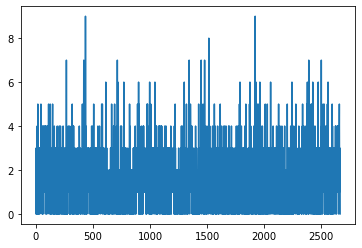

In [92]:
#Visualisons le nombre d'appel de client vers le service client
data["Customer service calls"].plot()

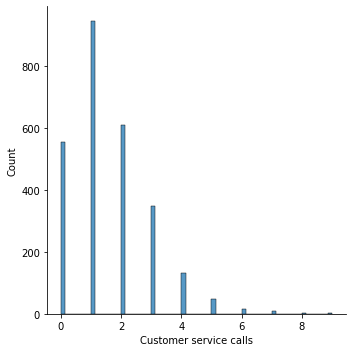

In [382]:
sb.displot(data["Customer service calls"])


In [84]:
# Dans notre démarche de data scientist nous devons émettre des hypothèses pertinentes pour minimiser le Biais.
# Hypothèse1: (845\2666)=35% contacte au moins une fois le service client et (555\2666)=20% ne le contacte jamais

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


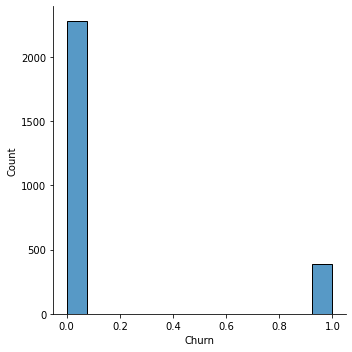

In [383]:
# Data visualisation d enotre target
sb.displot(data["Churn"])

In [384]:
data["Churn"].value_counts()
#hypothèse 2:14% résilie l'@ et 86% non.Donc les gens ont tendances à garder leur abonnemeng

False    2278
True      388
Name: Churn, dtype: int64

In [385]:
#
pd.crosstab(data["Churn"]=="True",data["Customer service calls"]) 

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,555,945,608,348,133,49,17,8,1,2


<AxesSubplot:xlabel='Total day calls', ylabel='Count'>

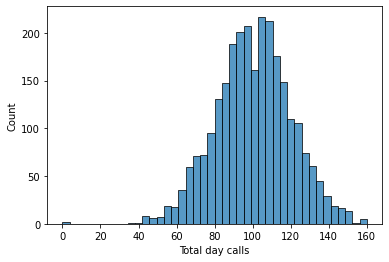

In [642]:
#Hypothèse3: Parmi ceux qui relisient leurs contrats on ne trouve aucun qui ai contacté au moins une fois le service client
sb.histplot(data["Total day calls"])

In [668]:
# On a max(appel/jr)=108 appels/jours------>environ 225 personnes 
#on a min(appel/jour)=40 appels/jour-------->environ  4 personnes #6 personnes qui ne passent pas d'appel 
#6 personnes qui ne passent pas d'appel 
#On remarque egalement que la distribution de cette variable suit une distribution normale,il existe une fonction analytique
# :la loi normale qui permet de modeliser cette distribution.Eh oui lesmathématiques se concrétisent en ML:
 

In [643]:
pd.crosstab(data["Total day calls"]>40,data["Churn"])
 

Churn,False,True
Total day calls,,
False,3,1
True,2275,387


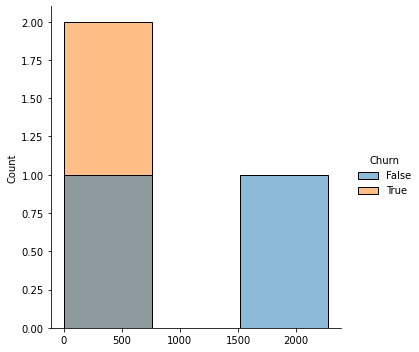

In [644]:
sb.displot(pd.crosstab(data["Total day calls"]>40,data["Churn"]))

In [390]:
#Hypothèse4: les abonnés ayant plus de 4 appels/jour ne resilient pas leur abonnement
# Statistiquement nous avons 85% qui ne resilient pas et 20% qui le resilient
#C'est assez logique vu qu'il serait un peu inconsidéré de suspendre un service que l'on utilise quotidiennement 

<AxesSubplot:xlabel='Total intl calls', ylabel='Count'>

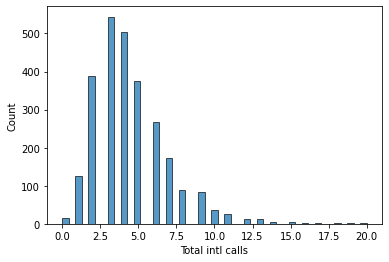

In [669]:
sb.histplot(data["Total intl calls"])


In [646]:
data["Total intl calls"].mean()

4.467366841710428

In [647]:
# on a en moyenne 5 appel international/jour /client

In [648]:
#A partir de là, on peut essayer de voir comment reagissent les clients qui resilient leur abonnment
# En considérant le nombre moyen d'appel international /jour/client
pd.crosstab(data["Total intl calls"]>4.47,data["Churn"])

Churn,False,True
Total intl calls,,
False,1314,261
True,964,127


<AxesSubplot:xlabel='Total intl calls'>

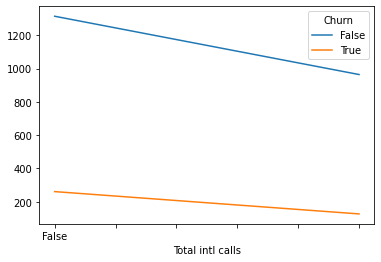

In [394]:
pd.crosstab(data["Total intl calls"]>4.47,data["Churn"]).plot()

<AxesSubplot:>

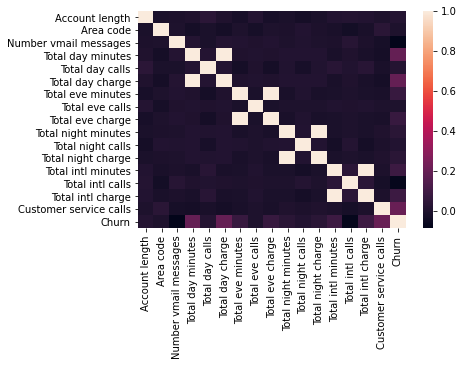

In [395]:
#Hypothèse5: Parmi Ceux qui ont nbr_apl_international>m=4.47  on a environ  1/9 des personnes qui ne résilient pas
#leur abonnement
#Ca apparait comme on peu plus logique vu que si la personne communique  beaucoup  avec l'international cest qu'elle
#son abonnement lui est très utile donc pourquoi le resilierait elle?
#Visalisation de la matrice de correlation 
sb.heatmap(data.corr())
#Les corellations sont:
#(Total day charge-Total day minutes),(Total eve charge-Total eve minute),(Total night charge-Total night minute)
#(Total intl charge-Total intl minute)

In [27]:
########################################### Feature Engenieering  #####################################################

In [396]:
#La Data analyse et la data visualisation nous on permis d'émettre certaines hypothèses,encore faudrait-elle qu'elles 
#soient vraies.Néanmoins nous allons nous basé sur celles pour filtrer les données les plus pertinentes.
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [649]:
#La data anaylse met en excergue les variables suivantes commes étant on peu pertinentes
#["Total day calls","Total eve calls","Total night calls","Total intl calls","Churn"]
 
from sklearn.linear_model import SGDClassifier
SGDClassifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [650]:
new_row=["Total day calls","Total eve calls","Total intl calls","Churn"]
new_data=data[new_row]
new_data["Churn"]=new_data.Churn.apply(lambda x:1 if str(x)=="True" else 0)
 

<ipython-input-650-db6b6a4c76e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Churn"]=new_data.Churn.apply(lambda x:1 if str(x)=="True" else 0)


In [651]:
data_test=pd.read_csv(r"C:\Users\HP\Documents\churn-bigml-20.csv")
new_data_test=data_test[new_row]
#new_data_test["Churn"]=new_data_test.Churn.apply(lambda x:0 if x=="True" else 1)
new_data_test["Churn"]=new_data_test.Churn.apply(lambda x:1 if str(x)=="True" else 0)
 

<ipython-input-651-add65a6c02c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_test["Churn"]=new_data_test.Churn.apply(lambda x:1 if str(x)=="True" else 0)


In [663]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier
SGDClassifier=SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
 


In [634]:
# On est dans le cas d'une classification binaire



In [690]:

x_train,y_train= split(new_data) 

x_test,y_test= split(new_data_test)


 Spliting Terminé *************************************************************************** 
 Spliting Terminé *************************************************************************** 


In [691]:
 training_score(model) 


 PAtienter svp *************************************************************************** 
Perceptron() ::
score:: 0.5450112528132033
GradientBoostingClassifier(learning_rate=0.04, n_estimators=5) ::
score:: 0.854463615903976
LogisticRegression() ::
score:: 0.854463615903976
SGDClassifier(max_iter=5) ::


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


score:: 0.8537134283570893
GaussianNB() ::
score:: 0.854463615903976
AdaBoostClassifier(learning_rate=0.04, n_estimators=5) ::
score:: 0.854463615903976
SVC() ::
score:: 0.854463615903976
LinearSVC() ::


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


score:: 0.854463615903976
RandomForestClassifier() ::
score:: 0.9932483120780196
DecisionTreeClassifier(random_state=2) ::
score:: 0.9932483120780196
 Terminé *************************************************************************** 


In [692]:
prediction_metrics(model)

 PAtienter svp *************************************************************************** 
modele : Perceptron()
la précision de  Perceptron() est : 53.223388305847074  %
[array([[307, 265],
       [ 47,  48]], dtype=int64)]
              precision    recall  f1-score   support

           0       0.87      0.54      0.66       572
           1       0.15      0.51      0.24        95

    accuracy                           0.53       667
   macro avg       0.51      0.52      0.45       667
weighted avg       0.77      0.53      0.60       667

modele : GradientBoostingClassifier(learning_rate=0.04, n_estimators=5)
la précision de  GradientBoostingClassifier(learning_rate=0.04, n_estimators=5) est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : LogisticRegression()
la précision de  LogisticRegression() est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : SGDClassifier(max_iter=5)
la précision de  SGDClassifier(max_iter=5) est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : GaussianNB()
la précision de  GaussianNB() est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : AdaBoostClassifier(learning_rate=0.04, n_estimators=5)
la précision de  AdaBoostClassifier(learning_rate=0.04, n_estimators=5) est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : SVC()
la précision de  SVC() est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : LinearSVC()
la précision de  LinearSVC() est : 85.75712143928035  %
[array([[572,   0],
       [ 95,   0]], dtype=int64)]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667

modele : RandomForestClassifier()
la précision de  RandomForestClassifier() est : 82.3088455772114  %
[array([[547,  25],
       [ 93,   2]], dtype=int64)]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       572
           1       0.07      0.02      0.03        95

    accuracy                           0.82       667
   macro avg       0.46      0.49      0.47       667
weighted avg       0.74      0.82      0.78       667

modele : DecisionTreeClassifier(random_state=2)
la précision de  DecisionTreeClassifier(random_state=2) est : 74.66266866566717  %
[array([[485,  87],
       [ 82,  13]], dtype=int64)]
     

In [ ]:
validation_croisee(model)

 Terminé *************************************************************************** 


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linea

In [661]:
#fig, axes = plot.subplots(nrows = 3,ncols = 3,figsize = (15,12))